In [66]:
import nglview as nv
import pandas as pd
import numpy as np
import MDAnalysis as mda
import mdtraj as md
import os
import scipy
import csv

import matplotlib.pyplot as plt

%load_ext rpy2.ipython

import warnings
warnings.filterwarnings('error', category=DeprecationWarning)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [13]:
!pwd

print()

/home/george/Desktop



In [11]:
dcd = ('step7_production.dcd')

In [12]:
psf = ('step5_input.psf')

In [14]:
u = mda.Universe ( psf , dcd )

In [16]:
output_csv_file = 'TM1_Replicate_1_Inter_Residue_Distances.csv'

In [17]:
proa_tm1 = u.select_atoms("protein and segid PROA and resid 11:41")

prob_tm1 = u.select_atoms("protein and segid PROB and resid 11:41")

In [26]:
frames = len(u.trajectory)
residues = len(proa_tm1)
distances = np.zeros((frames, residues))

In [27]:
for idx, ts in enumerate(u.trajectory):
    for i in range(residues):
        distance = np.linalg.norm(proa_tm1.positions[i] - prob_tm1.positions[i])
        distances[idx, i] = distance

In [28]:
time_step_ps = u.trajectory.dt

In [30]:
with open(output_csv_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    
    header = ['Time (ps)'] + [f'Residue {i + 11}' for i in range(residues)]
    csvwriter.writerow(header)
    
    for idx in range(frames):
        row = [idx * time_step_ps] + list(distances[idx])
        csvwriter.writerow(row)

CELLS BELLOW ARE GENERATED BY OPEN-AI'S GPT v3.5. 

SOME MANUAL ALTERATIONS BY ME, BUT NOT MY OWN WORK. 

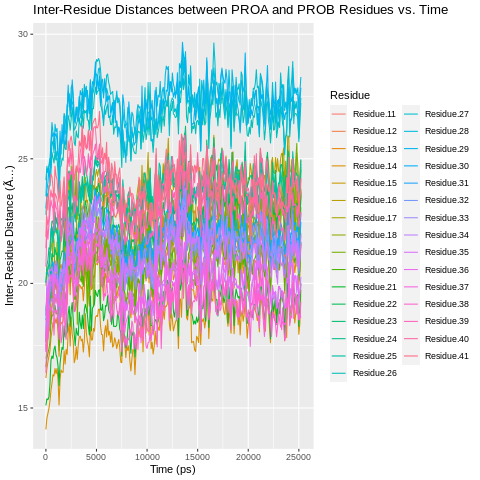

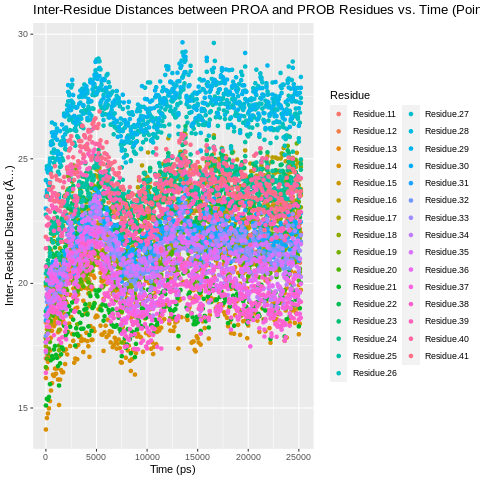

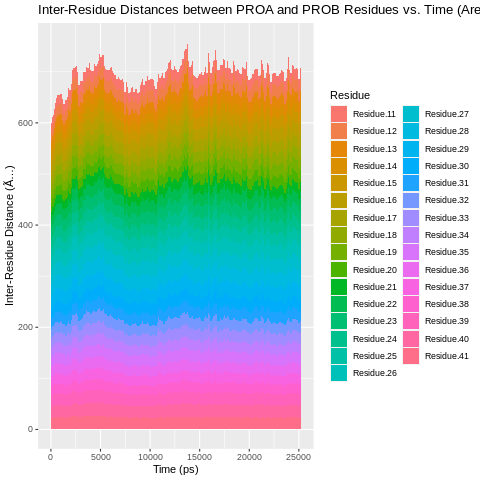

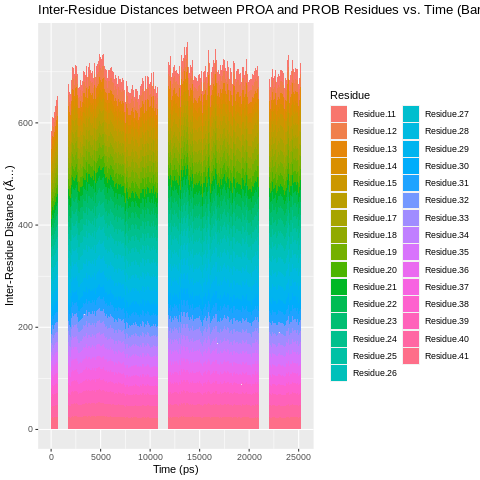

In [55]:

%%R

#options(repr.plot.width = 10, repr.plot.height = 6)


library(ggplot2)
library(reshape2)


data <- read.csv('TM1_Replicate_1_Inter_Residue_Distances.csv')


#melted_data <- melt(data, id.vars = 'Time..ps.')

residue_columns <- c('Time..ps.', paste0('Residue.', 11:41))
filtered_data <- data[, residue_columns]
melted_data <- melt(filtered_data, id.vars = 'Time..ps.')


my_plot <- ggplot(melted_data, aes(x = Time..ps., y = value, color = variable)) +
  geom_line() +
  labs(x = 'Time (ps)', y = 'Inter-Residue Distance (Å)',
       title = 'Inter-Residue Distances between PROA and PROB Residues vs. Time') +
  scale_color_discrete(name = 'Residue')


#ggsave("inter_residue_distances_plot.jpg", my_plot, width = 20, height = 6, dpi = 300)

# Point Plot
point_plot <- ggplot(melted_data, aes(x = Time..ps., y = value, color = variable)) +
  geom_point() +
  labs(x = 'Time (ps)', y = 'Inter-Residue Distance (Å)',
       title = 'Inter-Residue Distances between PROA and PROB Residues vs. Time (Point Plot)') +
  scale_color_discrete(name = 'Residue')

# Area Plot
area_plot <- ggplot(melted_data, aes(x = Time..ps., y = value, fill = variable)) +
  geom_area() +
  labs(x = 'Time (ps)', y = 'Inter-Residue Distance (Å)',
       title = 'Inter-Residue Distances between PROA and PROB Residues vs. Time (Area Plot)') +
  scale_fill_discrete(name = 'Residue')

# Bar Plot
bar_plot <- ggplot(melted_data, aes(x = Time..ps., y = value, fill = variable)) +
  geom_bar(stat = 'identity') +
  labs(x = 'Time (ps)', y = 'Inter-Residue Distance (Å)',
       title = 'Inter-Residue Distances between PROA and PROB Residues vs. Time (Bar Plot)') +
  scale_fill_discrete(name = 'Residue')

# Save the plots
#ggsave("line_plot.jpg", line_plot, width = 10, height = 6, dpi = 300)
#ggsave("point_plot.jpg", point_plot, width = 10, height = 6, dpi = 300)
#ggsave("area_plot.jpg", area_plot, width = 10, height = 6, dpi = 300)
#ggsave("bar_plot.jpg", bar_plot, width = 10, height = 6, dpi = 300)

print(my_plot)
print(point_plot)
print(area_plot)
print(bar_plot)

Saved plot 1 as output_plots/plot_1.svg 
Saved plot 2 as output_plots/plot_2.svg 
Saved plot 3 as output_plots/plot_3.svg 
Saved plot 4 as output_plots/plot_4.svg 
Saved plot 5 as output_plots/plot_5.svg 
Saved plot 8 as output_plots/plot_8.svg 
Saved plot 9 as output_plots/plot_9.svg 
Saved plot 11 as output_plots/plot_11.svg 
Saved plot 12 as output_plots/plot_12.svg 
Saved plot 14 as output_plots/plot_14.svg 


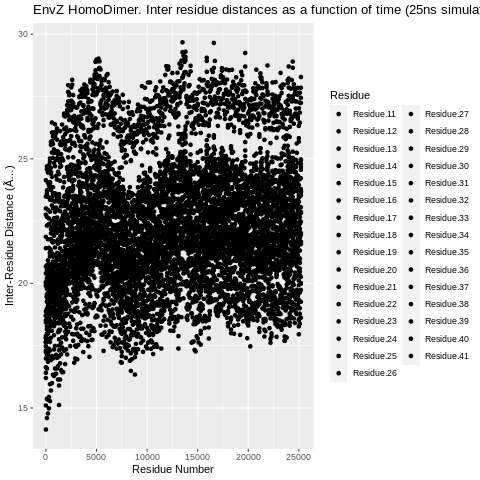

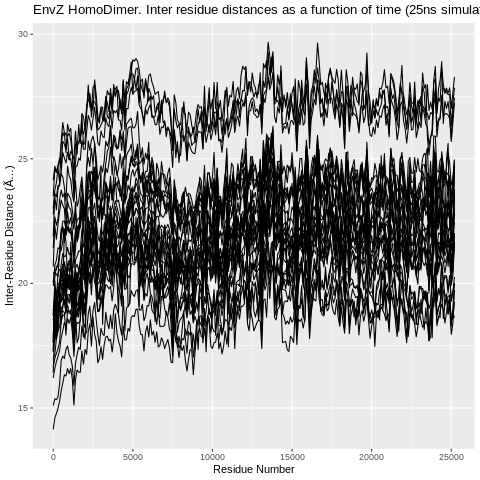

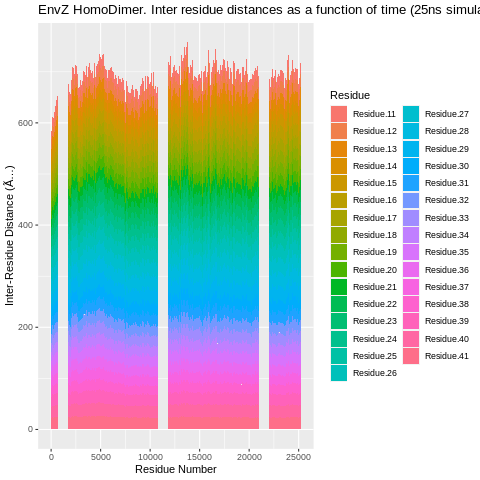

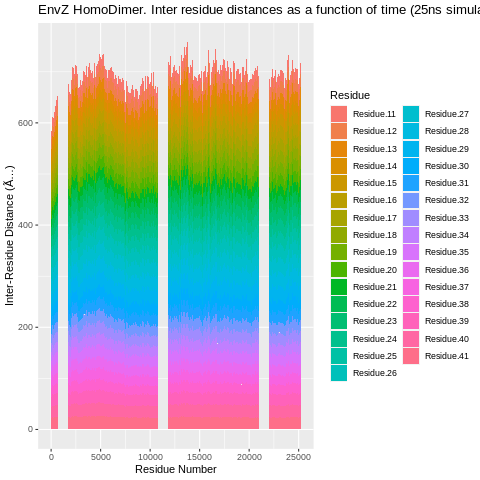

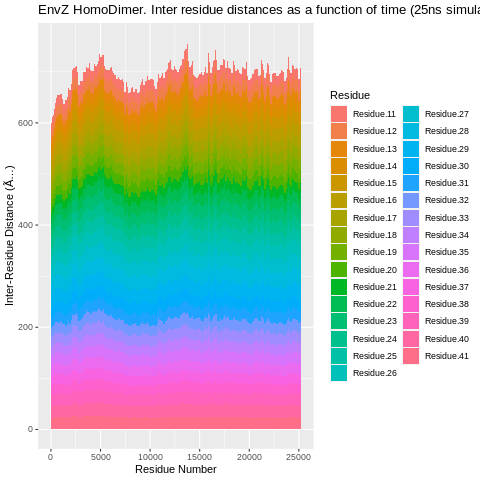

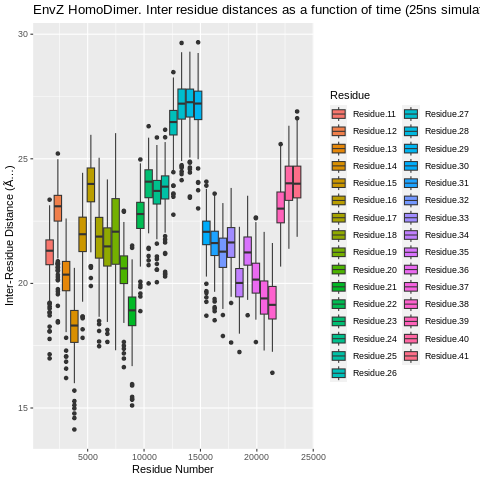

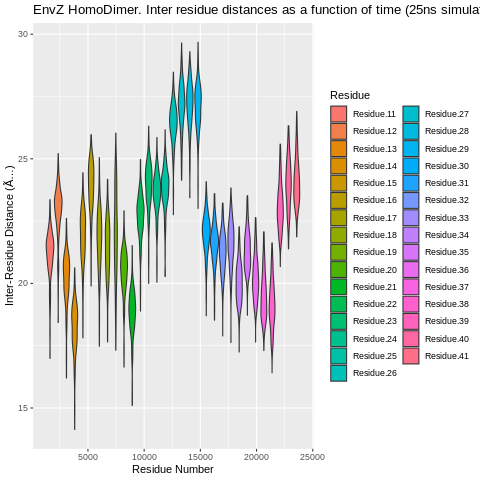

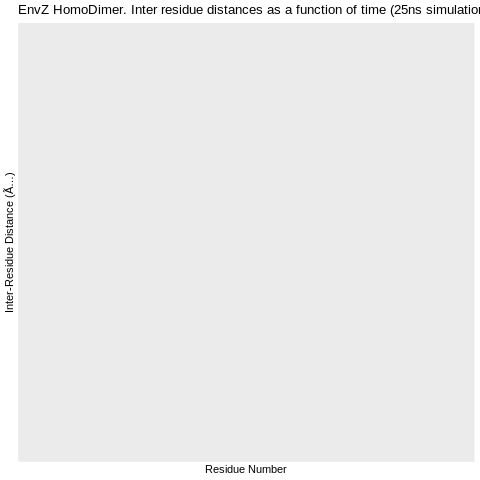

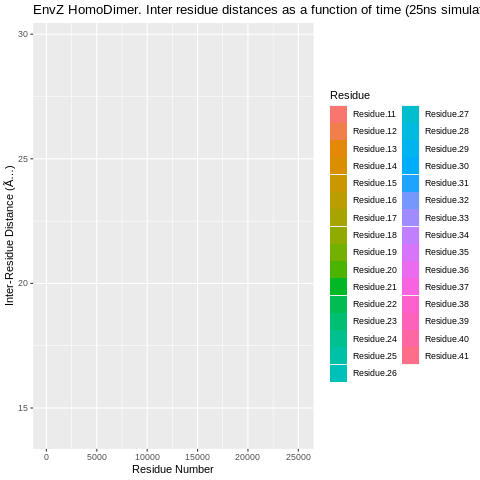

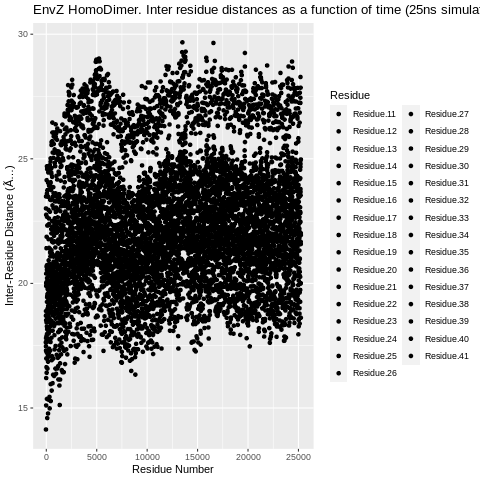

In [65]:
%%R

library(ggplot2)
library(reshape2)
library(repr)

data <- read.csv('TM1_Replicate_1_Inter_Residue_Distances.csv')

residue_columns <- c('Time..ps.', paste0('Residue.', 11:41))
filtered_data <- data[, residue_columns]
melted_data <- melt(filtered_data, id.vars = 'Time..ps.')

geom_layers <- list(
  geom_point(),
  geom_line(),
  geom_bar(stat = 'identity'),
  geom_col(),
  geom_area(),
  eval(NULL),  # Placeholder for geom_density()
  eval(NULL),  # Placeholder for geom_histogram()
  geom_boxplot(),
  geom_violin(),
  eval(NULL),  # Placeholder for geom_smooth()
  geom_hex(bins = 20),
  geom_tile(),
  eval(NULL),  # Placeholder for geom_raster()
  geom_jitter(),
  eval(NULL)   # Placeholder for geom_freqpoly()
)

# Increase plot size
options(repr.plot.width=12, repr.plot.height=8)  # Adjust width and height as needed

output_folder <- "output_plots"  # Specify the folder to save the plots

# Create the output folder if it doesn't exist
if (!dir.exists(output_folder)) {
  dir.create(output_folder)
}

for (i in seq_along(geom_layers)) {
  if (!is.null(geom_layers[[i]])) {
    geom_layer <- geom_layers[[i]]
    plot <- ggplot(melted_data, aes(x = Time..ps., y = value, fill = variable)) +
      geom_layer +
      labs(x = 'Residue Number', y = 'Inter-Residue Distance (Å)',
           title = paste('EnvZ HomoDimer. Inter residue distances as a function of time (25ns simulation) (', 
                         tools::toTitleCase(gsub("geom_", "", deparse(substitute(geom_layer)))), 
                         ')')) +
      scale_fill_discrete(name = 'Residue')

    # Display the plot
    print(plot)

    # Save the plot as SVG
    svg_file <- file.path(output_folder, paste0("plot_", i, ".svg"))
    ggsave(svg_file, plot, width = 12, height = 8, device = "svg")
    cat("Saved plot", i, "as", svg_file, "\n")
  }
}


CELLS BELLOW ARE NO LONGER GENERATED BY OPEN-AI'S GPT v3.5